# Лабораторна робота №6
Мета роботи: отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та градієнтного спуску.

Постановка задачі: Ознайомтесь з теоретичним матеріалом. Створіть програму для обчислення лінійної регресії
методом найменших квадратів та градієнтним спуском.

Протокол підготував студент групи ФБ-21 Шабанов Кирило

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as asasasasasasa

Завдання 1:
1. Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу результатів.

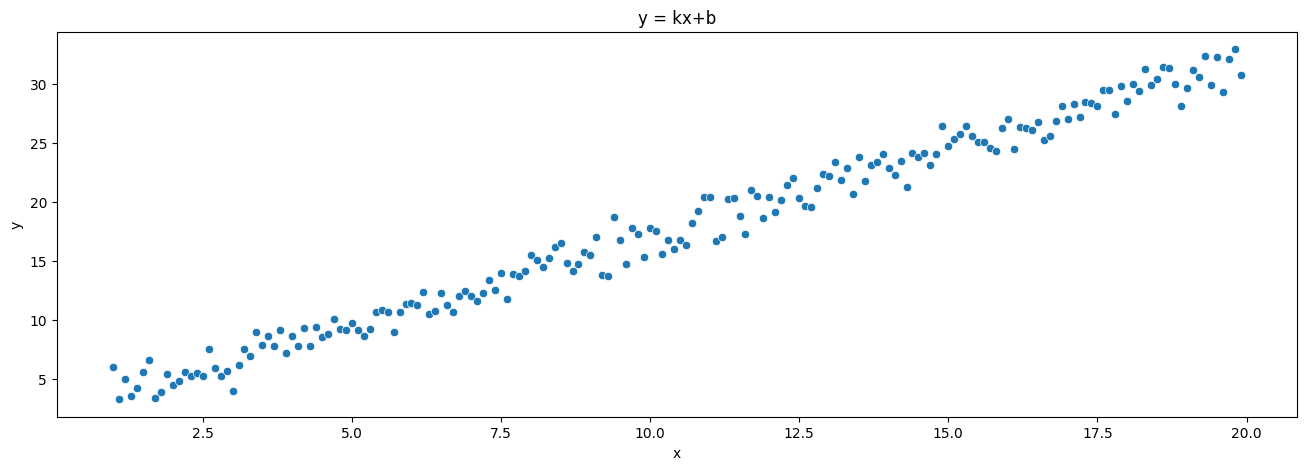

In [14]:
#Original function
x = np.arange(1,20,0.1)
b = 2
k = 1.5
y = k*x+b
#add noise
def gen_random_data(y,size,scale):
    f = np.random.normal(loc = y, scale=scale, size=size)
    return f

y_0 = gen_random_data(y, y.shape[0],1)

plt.figure(figsize=(16,5))
plt.title('y = kx+b')
plt.xlabel('x')
plt.ylabel('y')
sns.scatterplot(x=x,y=y_0)
plt.show()


2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k та b.

In [15]:
def least_square_method(x,y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    k = np.sum((x-mean_x)*(y-mean_y))/np.sum((x-mean_x)**2)
    b = mean_y - k*mean_x

    return k,b

3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [16]:
#numpy library 
f2 = np.polyfit(x,y_0,1)
y2 = f2[0]*x+f2[1]
y2-y

array([0.06077799, 0.06077886, 0.06077972, 0.06078059, 0.06078146,
       0.06078232, 0.06078319, 0.06078405, 0.06078492, 0.06078578,
       0.06078665, 0.06078751, 0.06078838, 0.06078924, 0.06079011,
       0.06079097, 0.06079184, 0.0607927 , 0.06079357, 0.06079444,
       0.0607953 , 0.06079617, 0.06079703, 0.0607979 , 0.06079876,
       0.06079963, 0.06080049, 0.06080136, 0.06080222, 0.06080309,
       0.06080395, 0.06080482, 0.06080568, 0.06080655, 0.06080741,
       0.06080828, 0.06080915, 0.06081001, 0.06081088, 0.06081174,
       0.06081261, 0.06081347, 0.06081434, 0.0608152 , 0.06081607,
       0.06081693, 0.0608178 , 0.06081866, 0.06081953, 0.06082039,
       0.06082126, 0.06082213, 0.06082299, 0.06082386, 0.06082472,
       0.06082559, 0.06082645, 0.06082732, 0.06082818, 0.06082905,
       0.06082991, 0.06083078, 0.06083164, 0.06083251, 0.06083337,
       0.06083424, 0.06083511, 0.06083597, 0.06083684, 0.0608377 ,
       0.06083857, 0.06083943, 0.0608403 , 0.06084116, 0.06084

4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

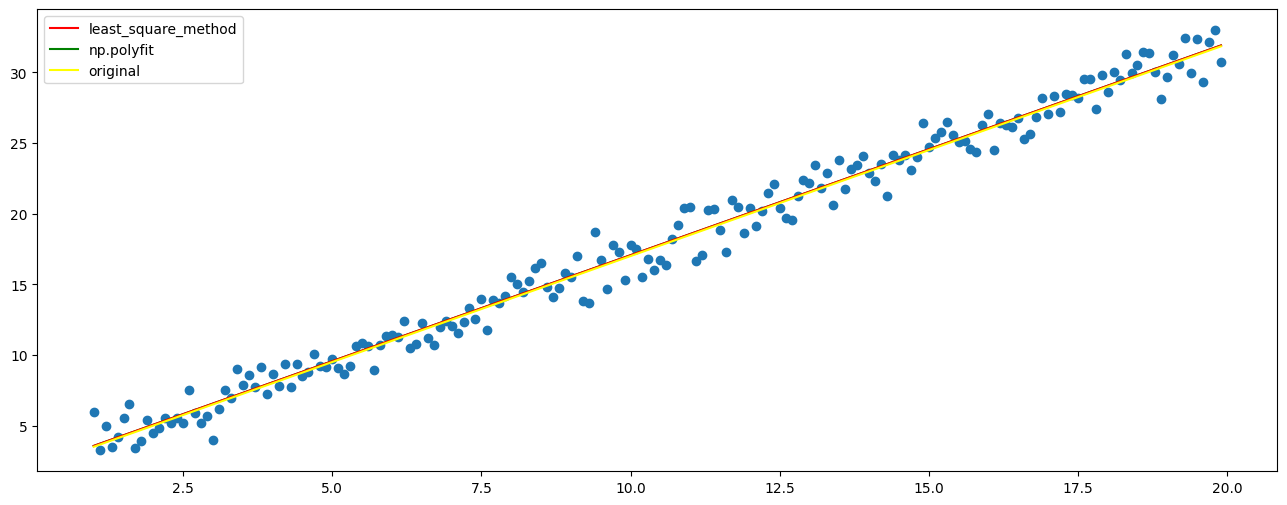

In [17]:
#least_square_method
k1,b1 = least_square_method(x,y_0)
y1 = k1*x+b1

#graphic function
plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.scatter(x,y_0)


l2, = ax.plot(x,y2,color='green')
l1, = ax.plot(x,y1,color='red')
l3, = ax.plot(x,y,color='yellow')
ax.legend([l1, l2, l3], ['least_square_method', 'np.polyfit', 'original'])
plt.show()

Завдання 2 (2б):
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [18]:
def grad_descent(x,y,k,b,learning_rate, iter_n):
    params = np.zeros(shape=(2,))
    n = y.shape[0]
    for _ in range(iter_n):
        f = k*x+b
        d1_b = (-2/n)*np.sum(y-f)
        d2_k = (-2/n)*np.sum(x*(y-f))
        b = b-learning_rate*d1_b
        k = k-learning_rate*d2_k

    params[0] = k
    params[1] = b
    return params

params = grad_descent(x,y_0,0,0,0.003515,10000)

y3 = params[0]*x+params[1]

2. Додайте отриману лінію регресії на загальний графік

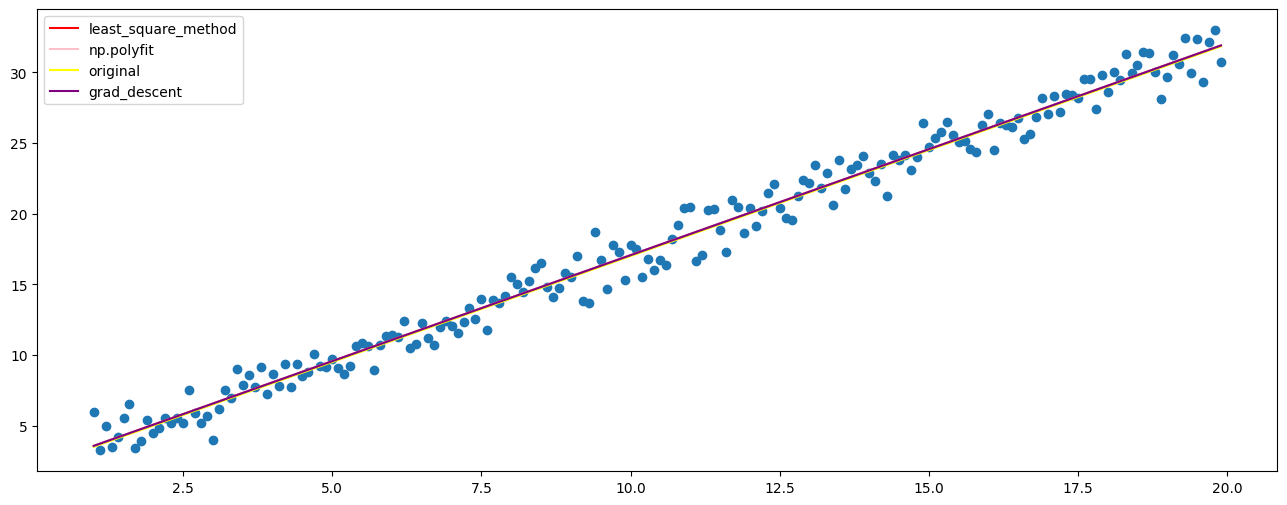

In [19]:
plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.scatter(x,y_0)

l1, = ax.plot(x,y1,color='red')
l2, = ax.plot(x,y2,color='pink')
l3, = ax.plot(x,y,color='yellow')
l4, = ax.plot(x,y3,color='purple')
ax.legend([l1, l2, l3,l4], ['least_square_method', 'np.polyfit', 'original','grad_descent'])
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

In [20]:
def mst_func(y,y_tilda):
    n = y.shape[0]
    res = np.sum((y-y_tilda)**2)/n
    return res

In [21]:
iters = np.arange(0,1000,1)
mst_v = np.zeros(iters.shape)

for i in iters:
    if i==0:
        mst_v[i]=np.nan
        continue
    
    params1 = grad_descent(x,y_0,0,0,0.003515,i)
    func = params1[0]*x+params1[1]
    mst_v[i] =  mst_func(y_0,func)

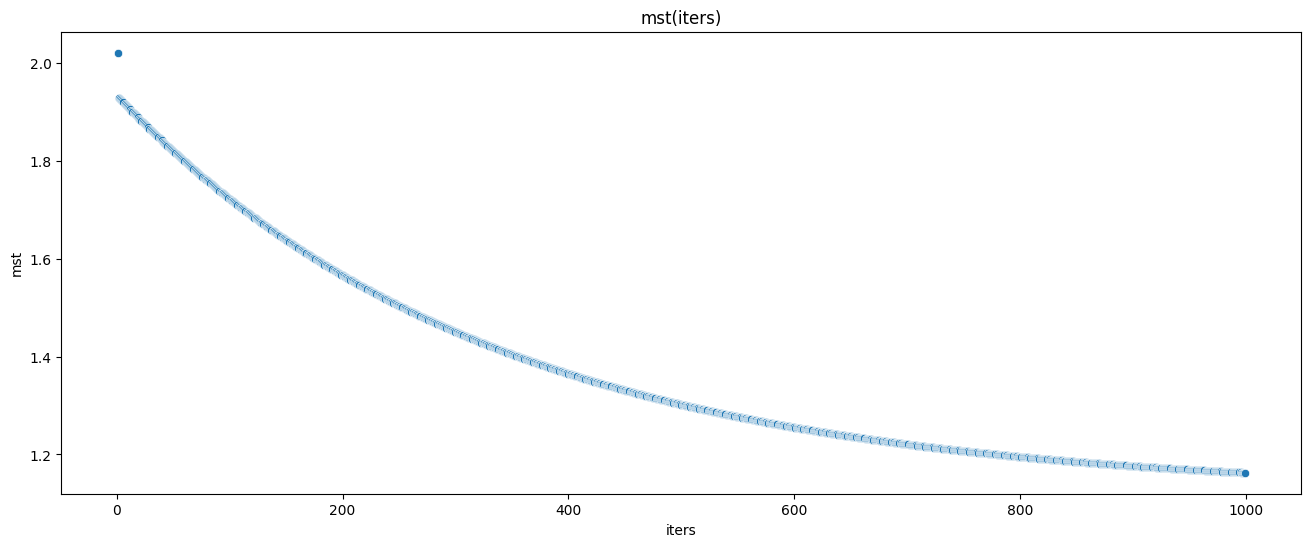

In [22]:
plt.figure(figsize=(16,6))
plt.xlabel('iters')
plt.ylabel('mst')
sns.scatterplot(x=iters,y=mst_v)
plt.title('mst(iters)')
plt.show()

З графіку видно, що чим більша кількість ітерацій, тим значення MST ближче до нуля => підвищення точності прогнозів

4. Порівняйте отримані результати з результатами попереднього завдання

In [23]:
print("Точнсть методу найменших квадратів:",mst_func(y,y1))
print("Точнсть методу градієнтного спуску:",mst_func(y,y2))

Точнсть методу найменших квадратів: 0.0037039135086920994
Точнсть методу градієнтного спуску: 0.003703913508691269


In [24]:
def mae_func(y,y_tilda):
    n = y.shape[0]
    res = np.sum(np.abs(y-y_tilda))/n
    return res

print("Точність методу найменших квадратів:",mae_func(y,y1))
print("Точність методу градієнтного спуску:",mae_func(y,y2))

Точність методу найменших квадратів: 0.06085976713846606
Точність методу градієнтного спуску: 0.060859767138459246
